In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score)
import joblib

In [3]:
from google.colab import files
uploaded=files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [4]:
# 1. Load Data
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(f"Dataset shape: {df.shape}")
print(df['Attrition'].value_counts(normalize=True))

Dataset shape: (1470, 35)
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


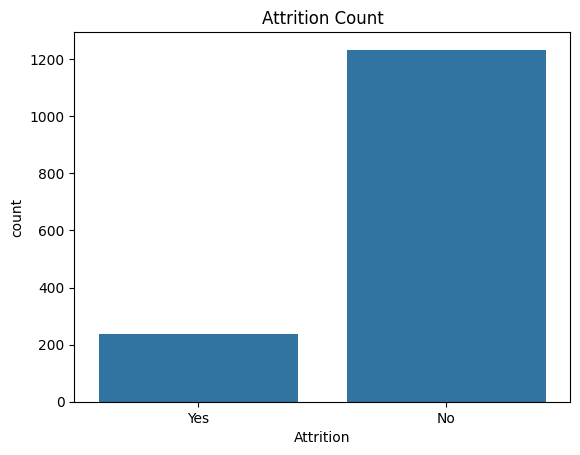

In [5]:
# 2. EDA
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Count')
plt.show()


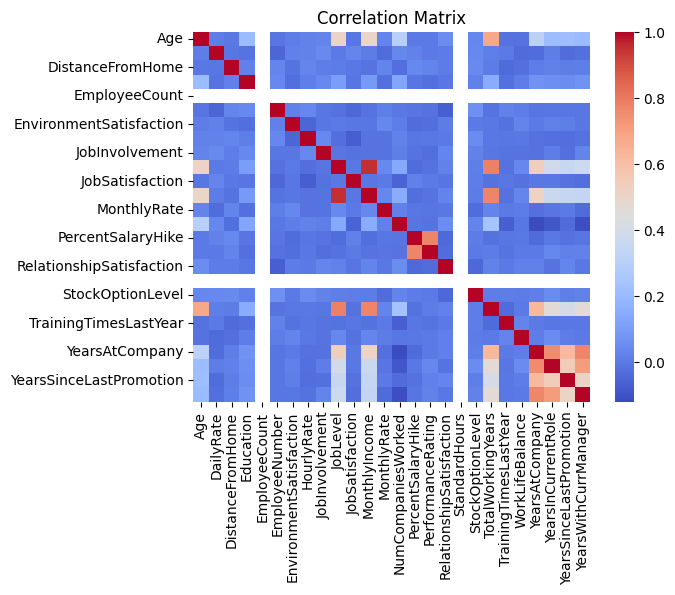

In [6]:
# Correlation heatmap
numeric = df.select_dtypes(include='number')
sns.heatmap(numeric.corr(), fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# 3. Preprocessing
# a. Encode target
df['Attrition_flag'] = df['Attrition'].map({'Yes':1, 'No':0})

# b. Label encode binary categoricals
le = LabelEncoder()
for col in ['Gender', 'OverTime']:
    df[col] = le.fit_transform(df[col])

# c. One-hot encode multi-class categoricals
df = pd.get_dummies(df, columns=[
    'BusinessTravel', 'Department', 'EducationField',
    'JobRole', 'MaritalStatus'
], drop_first=True)

# d. Feature engineering
df['SatisfactionScore'] = (
    df['EnvironmentSatisfaction'] +
    df['JobSatisfaction'] +
    df['RelationshipSatisfaction']
)

# e. Drop irrelevant columns
drop_cols = ['EmployeeCount', 'EmployeeNumber',
             'Over18', 'StandardHours', 'Attrition']
df_model = df.drop(columns=drop_cols)


In [8]:
# Split data
X = df_model.drop(columns='Attrition_flag')
y = df_model['Attrition_flag']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [9]:
# 4. Train Random Forest with tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)

model = grid.best_estimator_



Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [10]:
# 5. Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report: \n",classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.8299319727891157
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       370
           1       0.40      0.11      0.18        71

    accuracy                           0.83       441
   macro avg       0.63      0.54      0.54       441
weighted avg       0.78      0.83      0.79       441

ROC-AUC: 0.7375713741910924


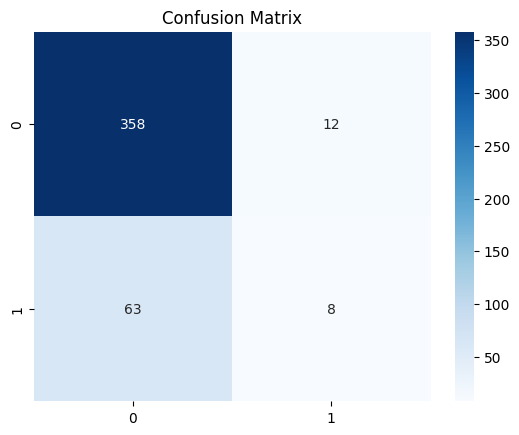

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


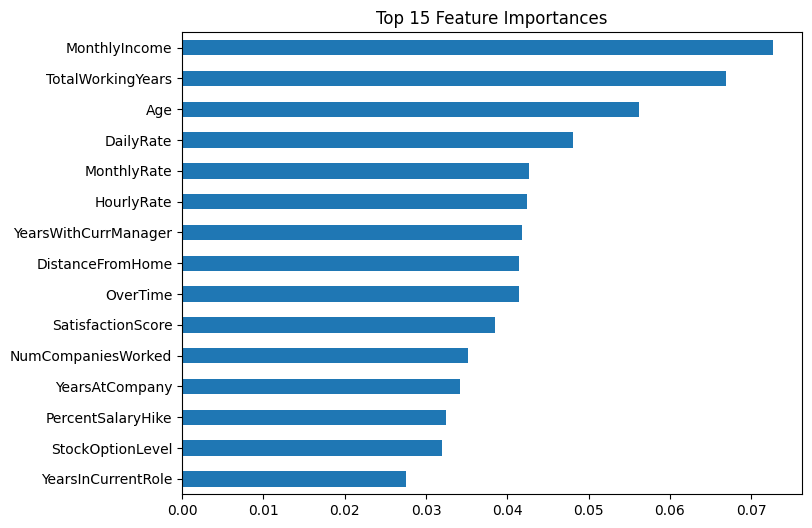

In [15]:
# 6. Feature importance
fi = pd.Series(model.feature_importances_, index=X.columns)
fi.nlargest(15).sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Top 15 Feature Importances')
plt.show()

In [16]:
# 7. Save model
joblib.dump(model, 'attrition_rf_model.pkl')
print("Model saved to attrition_rf_model.pkl")

Model saved to attrition_rf_model.pkl


In [17]:
import joblib
joblib.dump(model, 'attrition_rf_model.pkl')

['attrition_rf_model.pkl']

In [18]:
from google.colab import files
files.download('attrition_rf_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# Train your model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model
import joblib
joblib.dump(model, 'attrition_rf_model.pkl')

# Download to your computer
from google.colab import files
files.download('attrition_rf_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>